In [1]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
print tips[:5]
print len(tips)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
244


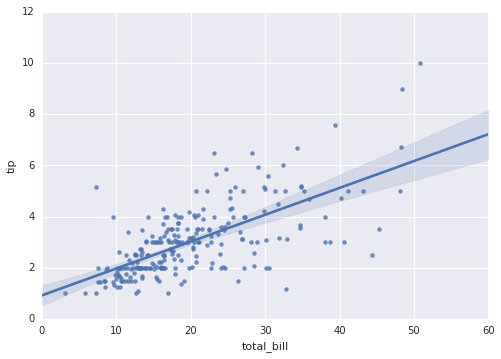

In [2]:
ax = sns.regplot(x="total_bill", y="tip", data=tips)

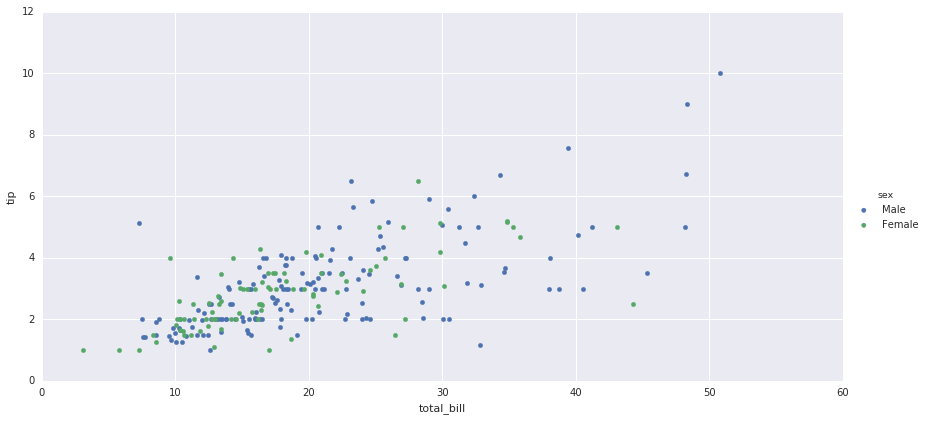

In [3]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(tips, hue="sex", size=6, aspect=2)
g.map(plt.scatter, "total_bill", "tip")
g.add_legend()

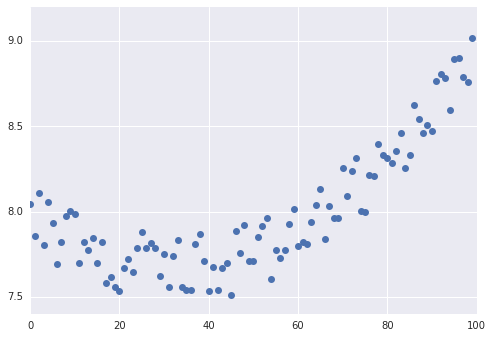

In [4]:
import random
import numpy as np
x = np.arange(0,1,0.01)
y = 3*x*x - 2*x + 8
y = y + random.sample(np.arange(-0.2,0.2,0.4/len(y)), len(y))
plt.plot(y, marker='o', linestyle='None')

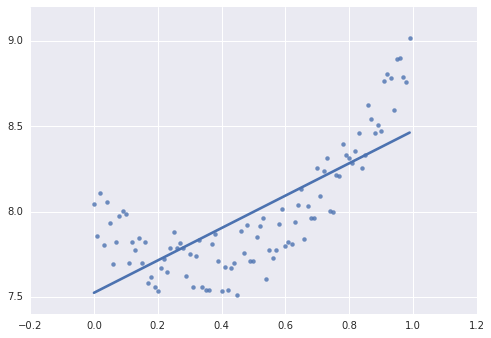

In [5]:
ax = sns.regplot(x, y, ci=None, truncate=True)

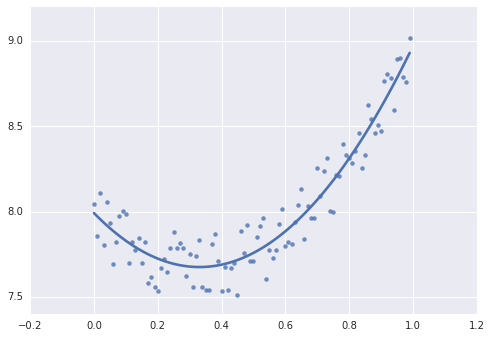

In [6]:
ax = sns.regplot(x, y, order=2, ci=None, truncate=True)

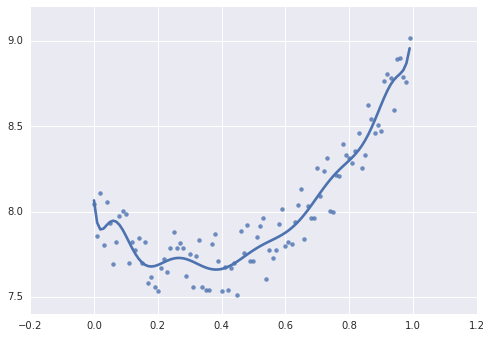

In [7]:
ax = sns.regplot(x, y, order=12, ci=None, truncate=True)

In [14]:
import tensorflow as tf
import pandas as pd
import seaborn as sns;
tips = sns.load_dataset("tips")
tips = tips.sample(frac=1.0)
trainsize = int(len(tips) * 0.8)
df_train = tips[:trainsize]
print df_train[:5]

     total_bill   tip     sex smoker   day    time  size
118       12.43  1.80  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
197       43.11  5.00  Female    Yes  Thur   Lunch     4
13        18.43  3.00    Male     No   Sun  Dinner     4
141       34.30  6.70    Male     No  Thur   Lunch     6


In [18]:
# working with numpy arrays works
tf.logging.set_verbosity(tf.logging.INFO)
predictors = df_train.loc[:,['total_bill', 'size']].values # np.ndarray
targets = df_train.iloc[:,1].values
features = tf.contrib.learn.infer_real_valued_columns_from_input(predictors)
model = tf.contrib.learn.LinearRegressor(feature_columns=features)
model.fit(predictors, targets, steps=1000)

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=2, default_value=None, dtype=tf.float32)
INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Step 1: loss = 11.156
INFO:tensorflow:Step 101: loss = 1.02347
INFO:tensorflow:Step 201: loss = 1.01918
INFO:tensorflow:Saving checkpoints for 300 into /tmp/tmpcoJd6z/model.ckpt.
INFO:tensorflow:Step 301: loss = 0.9993
INFO:tensorflow:Step 401: loss = 0.980857
INFO:tensorflow:Step 501: loss = 0.968228
INFO:tensorflow:Saving checkpoints for 600 into /tmp/tmpcoJd6z/model.ckpt.
INFO:tensorflow:Step 601: loss = 0.960371
INFO:tensorflow:Step 701: loss = 0.955816
INFO:tensorflow:Step 801: loss = 0.953299
INFO:tensorflow:Saving checkpoints for 900 into /tmp/tmpcoJd6z/model.ckpt.
INFO:tensorflow:Step 901: loss = 0.951957
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpcoJd6z/model.ckpt.
INFO:tensorflow:Loss for final step: 0.951266.


LinearRegressor()

In [28]:
# ERROR: ValueError: Data types for data must be int, float, or bool
targets = df_train.iloc[:,1].values
features = [tf.contrib.layers.real_valued_column(colname) for colname in ['total_bill', 'size']]
model = tf.contrib.learn.LinearRegressor(feature_columns=features)
model.fit(df_train, targets, steps=1000)

ValueError: Data types for data must be int, float, or bool.

In [29]:
# ERROR: KeyError: 'size'
predictors = pd.DataFrame(data={'total_bill': df_train['total_bill'].values, 'size': df_train['size'].values})
print predictors[:5]
targets = df_train.iloc[:,1].values
features = [tf.contrib.layers.real_valued_column(colname) for colname in ['total_bill', 'size']]
model = tf.contrib.learn.LinearRegressor(feature_columns=features)
model.fit(predictors, targets, steps=1000)

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='size', dimension=1, default_value=None, dtype=tf.float32)


   size  total_bill
0     2       12.43
1     2       14.78
2     4       43.11
3     4       18.43
4     6       34.30


KeyError: 'size'